In [1]:
# Problema computacional Guia 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random as rm
import math

# Punto 1

In [266]:
p = 0.6
suma1 = 0
suma2 = 0
N = 100000
for i in range (N):
    a = rm.uniform(0,1)
    if 0 <= a < p: #Intervalo [0,p) ; tiene probabilidad p.
        suma1 = suma1 + 1
    elif p <= a < 1: #Intervalo [1,p) ; tiene probabilidad 1 - p.
        suma2 = suma2 + 1
print (suma1/N)
print (suma2/N)

0.59813
0.40187


In [2]:
# n : Número de repeticiones. p: Probabilidad de que ocurra.
# La probabilidad de que la var_alea sea menor a p es p. Por ende voy a tener una cantidad de exitos dada por esa probabilidad.
# Es decir, si tengo 50% de probabilidades de tener un éxito, este código da como resultado que "exitos" es igual al 50% de n. 
def ensayo_jakob (n,p):
    exitos = 0
    for i in range (n):
        var_alea = rm.uniform (0,1) # Uniform (a,b), tira floats (reales) aleatorios entre a y b.
        if var_alea < p:
            exitos = exitos + 1
    return exitos

print (ensayo_jakob (1000,0.5))
# Donde "n" es el número de repeticiones que se hizo de determinado evento y "p" la probabilidad de este.

497


In [6]:
n_fotones = 15
e_detector = 0.75
N = 1000

fotones_detectados = []
for _ in range (N):
    fotones_detectados.append(ensayo_jakob (n_fotones,e_detector)) 

# Punto 2

0.172


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


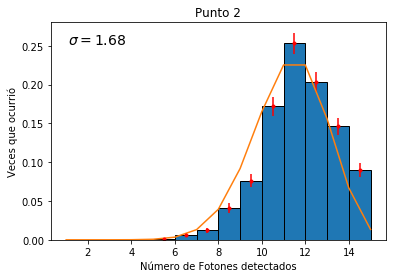

In [15]:
# n_fotones = 15
# e_detector = 0.75
# N = 1000

# fotones_detectados = []
# for _ in range (N):
#     fotones_detectados.append(ensayo_jakob (n_fotones,e_detector)) 
# Como número de repeticiones ponemos el nro de fotones y en probabilidad del evento la eficiencia del detector, porque el evento
# observado es si el fotón que llega al detector es observado o no; esto ocurre n_fotones veces con una probabilidad e_detector.

    
_, ax = plt.subplots()
# Para graficar el histograma.
alt, anch, _ = plt.hist (fotones_detectados, edgecolor = "black"), normed = True, bins = 10)
plt.xlabel ("Número de Fotones detectados")
plt.ylabel ("Veces que ocurrió")
plt.title ("Punto 2")

# Para escribir la desviación estandar en el Histograma.
sigma =  stats.binom.std (n_fotones,e_detector)
textstr = r'$\sigma=%.2f$' % (sigma, )
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

# Para graficar la función binomial.
x = np.arange (1,n_fotones+1)
y = []
for i in range (1,n_fotones+1):
    y.append(stats.binom.pmf (i,n_fotones,e_detector))
plt.plot (x,y)

#Para dibujar el error.
centrobin = 0.5*(anch[1:]+anch[:-1]) # El array "anch" tiene 1 elemento mas que el array "alt". Tomo el centro del bin.
sigma_histograma = []
for i in range (len(alt)):
    sigma_histograma.append(math.sqrt(N*alt[i]*(1-alt[i]))/N)

plt.errorbar (centrobin,alt,yerr = sigma_histograma, fmt = " .r") 
print (alt[5])
plt.show ()

# Punto 3

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


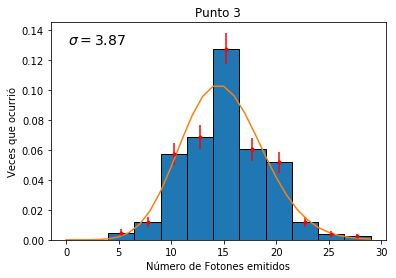

In [71]:
I = 15
dt = 1/1000
p = I * dt

N = 1000
fotones_emitidos = []
for _ in range (N): # Lo que estoy diciendo aca es que el experimento de ver lo que pasa en 1s lo repito 10000 veces.
    fotones_emitidos.append(ensayo_jakob (1000,p))
# La fuente emite con una probabilidad p en un dt un foton. Quiero ver cuantos emitio (exitos) en un segundo. Como dt es 1/1000,
# en un segundo hay 1000 dt entonces el evento sucede 1000 veces, y voy sumando los exitos. Al final luego de las 1000 
# repeticiones, tengo una lista con la cantidad de fotones que se emitieron en cada segundo.


_, ax = plt.subplots()
# Para graficar el histograma.
alt, anch, _ = plt.hist (fotones_emitidos, edgecolor = "black", normed = True)
plt.xlabel ("Número de Fotones emitidos")
plt.ylabel ("Veces que ocurrió")
plt.title ("Punto 3")

# Para escribir la desviación estandar en el Histograma.
mu = 15 
sigma = stats.poisson.std (mu)
textstr = r'$\sigma=%.2f$' % (sigma, )
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

# Para graficar la poisson.
mu = 15 
x = np.arange(0,max(fotones_emitidos)+1) # Son todos los posibles valores de k.
y = stats.poisson.pmf(x,mu)

plt.plot (x,y)

#Para dibujar el error.
centrobin = 0.5*(anch[1:]+anch[:-1]) # El array "anch" tiene 1 elemento mas que el array "alt". Tomo el centro del bin.
sigma_histograma = []
for i in range (len(alt)):
    sigma_histograma.append(math.sqrt(N*alt[i]*(1-alt[i]))/N)

plt.errorbar (centrobin,alt,yerr = sigma_histograma, fmt = " .r") 

plt.show()

1. Es valido utilizar un programa que simula ensayos de bernoulli porque este experimento tiene dos resultados posibles; éxitos (emitió fotón en dt) y fracasos (NO - emitió fotón en dt).
2. Siempre se puede asumir que como mucho se emitirá un solo fotón en ese dado intervalo, porque como este lo elijo yo, uno siempre puede asumir que el intervalo es suficientemente chico como para incluir solo un éxito del fenómeno observado.
3. Se puede aproximar utilizando Poisson porque:
    a) Se tomó un intervalo de tiempo suficientemente chico como para asumir que como mucho solo se emite un fotón en este.
    b) La probabilidad de encontrarlo es proporcional al diferencial de tiempo.
    c) La probabilidad de encontrar un fotón en el primer dt es independiente de encontrarlo en los dt siguientes.
4. Debido a estos tres items, se cumplen las hipótesis necesarias para la Poisson (CITAR 79 FRODESEN).

# Punto 4

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


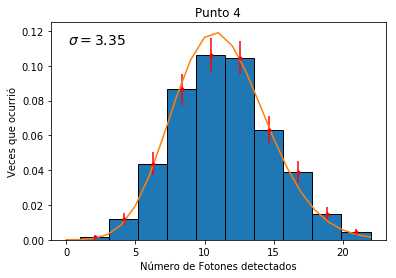

In [72]:
#ESTE ES EL POSTA.

I = 15
dt = 1/1000
p = I * dt

N = 1000
fotones_detectados = []
for _ in range (N): 
    fotones_emitidos = ensayo_jakob (1000,p) #fotones emitidos en 1s.
    e_detector = 0.75
    fotones_detectados.append(ensayo_jakob (fotones_emitidos,e_detector)) # En este segundo analizado donde se emitieron una
    # cantidad de fotones igual a fotones_emitidos cuantos de estos fueron detectados viene dado por esta linea.
    
    
_, ax = plt.subplots()
# Para graficar el histograma.
alt, anch, _ = plt.hist (fotones_detectados, edgecolor = "black", normed = True)
plt.xlabel ("Número de Fotones detectados")
plt.ylabel ("Veces que ocurrió")
plt.title ("Punto 4")

# Para escribir la desviación estandar en el Histograma.
mu = e_detector * I
sigma =  stats.poisson.std (mu)
textstr = r'$\sigma=%.2f$' % (sigma, )
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

# Para graficar la Poisson.
mu = e_detector * I
x = np.arange(0,max(fotones_detectados)+1) # Son todos los posibles valores de k.
y = stats.poisson.pmf(x,mu)

plt.plot (x,y)

#Para dibujar el error.
centrobin = 0.5*(anch[1:]+anch[:-1]) # El array "anch" tiene 1 elemento mas que el array "alt". Tomo el centro del bin.
sigma_histograma = []
for i in range (len(alt)):
    sigma_histograma.append(math.sqrt(N*alt[i]*(1-alt[i]))/N)

plt.errorbar (centrobin,alt,yerr = sigma_histograma, fmt = " .r") 

plt.show ()

1. Se gráfico una Poisson para la combinación de emisión y detección de fotones, debido a que la emisión cumple una distribución Poisson, la detección una Binomial y que la composición de ambas (que es lo que realizó al combinar ambos fenómenos) da una Poisson.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


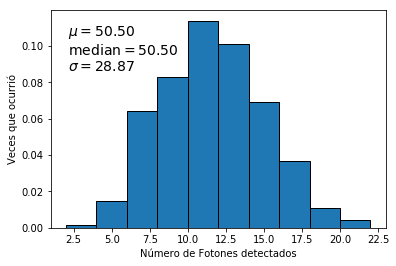

In [138]:
# OTRA OPCION PARA HACERLO.
I = 15
dt = 1/1000
p = I * dt

fotones_emitidos = []
for _ in range (1000): 
    fotones_emitidos.append(ensayo_jakob (1000,p))
    
# Detección.
fotones_detectados = []
for i in range (len(fotones_emitidos)):
    n_fotones = fotones_emitidos [i]
    e_detector = 0.75
    fotones_detectados.append(ensayo_jakob (n_fotones,e_detector))
    
plt.hist (fotones_detectados, edgecolor = "black", normed = True)
plt.xlabel ("Número de Fotones detectados")
plt.ylabel ("Veces que ocurrió")


# mu = e_detector * I
# x = np.arange(0,max(fotones_detectados)+1) # Son todos los posibles valores de k.
# y = stats.poisson.pmf(x,mu)

# plt.plot (x,y)
plt.show()

# Punto 5

1. ¿A que nos referimos con que el grafico es el mismo, pero en sentido estadistico?
2. Cuando dice histogramas y curvas teóricas, ¿hay mas de uno?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


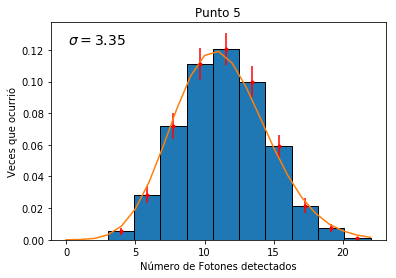

In [78]:
I = 15
n = 1000 # Subdivisiones de 1 segundo.
dt = 1/n

p_emit = I * dt # Esta es la proba de emitir un foton en tiempo dt.
p_detec = 0.75 # La eficiencia del detector es la probabilidad de detectarlo.

p_efect = p_emit * p_detec # La proba efectiva es la de emitirlo Y detectarlo.

N = 1000
fotones_detectados = []
for _ in range (N):
    fotones_detectados.append(ensayo_jakob (n,p_efect)) 
# En un dt tengo dos eventos la emisión de un fotón (con proba p_emit) y su detección (con proba p_detec), en un segundo eso 
# sucede 1000 veces. Para cada iteración del "for", sucede eso con una dada proba, y yo registro ese evento (la cantidad de 
# fotones detectados por segundo).

_, ax = plt.subplots()
# Para graficar el histograma.
alt, anch, _ = plt.hist (fotones_detectados, edgecolor = "black", normed = True)
plt.xlabel ("Número de Fotones detectados")
plt.ylabel ("Veces que ocurrió")
plt.title ("Punto 5")

# Para escribir la desviación estandar en el Histograma.
mu = p_efect * n
sigma =  stats.poisson.std (mu)
textstr = r'$\sigma=%.2f$' % (sigma, )
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

# Para graficar la función Poisson.
mu = p_efect * n
x = np.arange(0,max(fotones_detectados)+1) # Son todos los posibles valores de k.
y = stats.poisson.pmf(x,mu)

plt.plot (x,y)

#Para dibujar el error.
centrobin = 0.5*(anch[1:]+anch[:-1]) # El array "anch" tiene 1 elemento mas que el array "alt". Tomo el centro del bin.
sigma_histograma = []
for i in range (len(alt)):
    sigma_histograma.append(math.sqrt(N*alt[i]*(1-alt[i]))/N)

plt.errorbar (centrobin,alt,yerr = sigma_histograma, fmt = " .r") 

plt.show ()

1. La probabilidad efectiva se calculo multiplicando la probabilidad de emitir un fotón con la probabilidad de detectarlo, porque tienen que pasar ambos eventos. Se tiene que emitir un fotón *y* se tiene que detectar.

# Punto 6

La probabilidad de tener de N eventos, n en un dado bin y el resto (N-n) en los otros bins, viene dada por una Binomial; ya que tenemos dos posibles resultados (esta en ese bin o no esta).